1. **Motivation**.
- What is your dataset?
- Why did you choose this/these particular dataset(s)?
- What was your goal for the end user's experience?

In [42]:
""" Importing packages """
import datetime as dt
import pandas as pd
import numpy as np
from bokeh.plotting import figure, output_file, save
import folium
import plotly.express as px

from utils.make_data import get_data, get_on_scene_map, clean_data
import json

from matplotlib.pyplot import figure, title, subplot, plot, hist, show
import seaborn as sns

from bokeh.models import ColumnDataSource, FactorRange, Legend, HoverTool
from bokeh.plotting import figure, show
from bokeh.palettes import YlGnBu, Spectral, Bokeh
from bokeh.io import output_file, show

In [4]:
""" Importing data """

dat_raw = get_data()
dat = clean_data(dat_raw)

# print the names of the columns of the data
print(dat.columns)

get_on_scene_map(dat)
print(dat.on_scene_time)
dat = dat.loc[dat["on_scene_time"] >= 0]
dat = dat.loc[dat["on_scene_time"] < 720]
print(dat[dat["on_scene_time"]<0])

print(dat.neighborhood.nunique())
print(dat.neighborhood.value_counts())

/Users/magnea/Desktop/DTU/Social Data/socialdataanalysis/utils/make_data.py:67: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  dat = pd.read_csv("data/fireIncidents_clean.csv", parse_dates=parse_dates)


Index(['call_number', 'unit_id', 'incident_number', 'call_type', 'call_date',
       'watch_date', 'received_dttm', 'entry_dttm', 'dispatch_dttm',
       'response_dttm', 'on_scene_dttm', 'transport_dttm', 'hospital_dttm',
       'call_final_disposition', 'available_dttm', 'address', 'battalion',
       'station_area', 'als_unit', 'call_type_group', 'number_of_alarms',
       'unit_type', 'unit_sequence', 'neighborhood', 'row_id', 'latitude',
       'longitude'],
      dtype='object')
0           4.033333
1           7.333333
2           4.050000
7           7.600000
8           4.316667
             ...    
3271972    16.533333
3271973     5.150000
3271974     7.316667
3271975     4.866667
3271976     3.483333
Name: on_scene_time, Length: 2585578, dtype: float64
Empty DataFrame
Columns: [call_number, unit_id, incident_number, call_type, call_date, watch_date, received_dttm, entry_dttm, dispatch_dttm, response_dttm, on_scene_dttm, transport_dttm, hospital_dttm, call_final_disposition, 

2. **Basic stats**. Let's understand the dataset better
- Write about your choices in data cleaning and preprocessing
- Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.

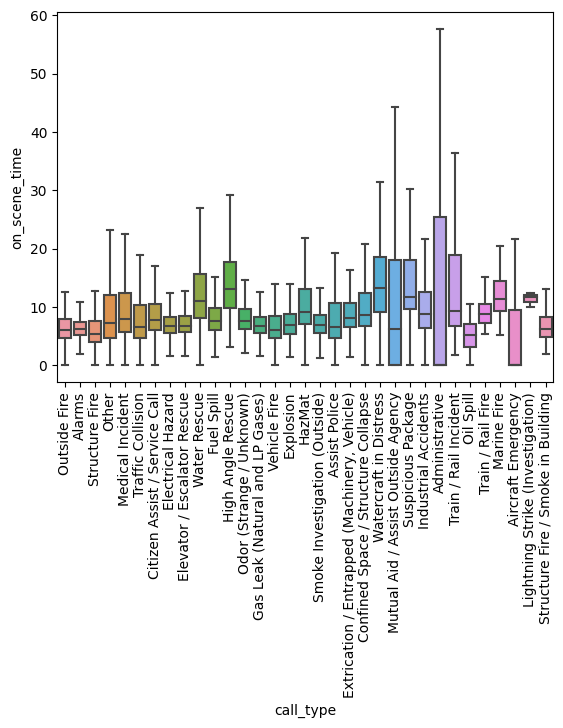

In [20]:
b = sns.boxplot(data = dat, x = "call_type", y = "on_scene_time",showfliers = False)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
b.get_figure();

In [34]:
print(dat["call_type"].unique())
fire_call_types = set(['Outside Fire','Structure Fire','Vehicle Fire','Explosion', 'Train / Rail Fire','Structure Fire / Smoke in Building','Electrical Hazard','Confined Space / Structure Collapse', 'Medical Incident',
 'Traffic Collision', 'Elevator / Escalator Rescue' ])
dat_fire = dat[dat["call_type"].isin(fire_call_types)]

['Outside Fire' 'Alarms' 'Structure Fire' 'Other' 'Medical Incident'
 'Traffic Collision' 'Citizen Assist / Service Call' 'Electrical Hazard'
 'Elevator / Escalator Rescue' 'Water Rescue' 'Fuel Spill'
 'High Angle Rescue' 'Odor (Strange / Unknown)'
 'Gas Leak (Natural and LP Gases)' 'Vehicle Fire' 'Explosion' 'HazMat'
 'Smoke Investigation (Outside)' 'Assist Police'
 'Extrication / Entrapped (Machinery, Vehicle)'
 'Confined Space / Structure Collapse' 'Watercraft in Distress'
 'Mutual Aid / Assist Outside Agency' 'Suspicious Package'
 'Industrial Accidents' 'Administrative' 'Train / Rail Incident'
 'Oil Spill' 'Train / Rail Fire' 'Marine Fire' 'Aircraft Emergency'
 'Lightning Strike (Investigation)' 'Structure Fire / Smoke in Building']


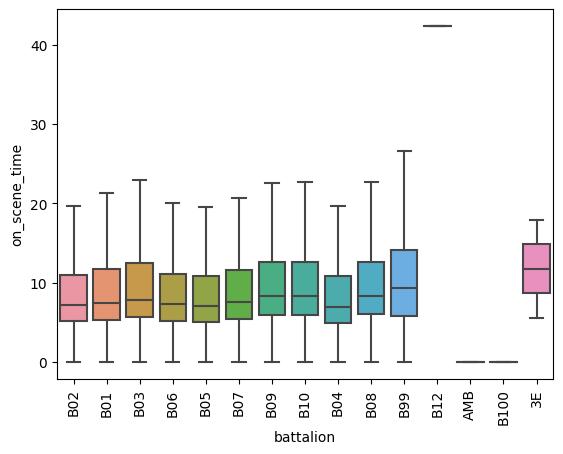

In [35]:
b = sns.boxplot(data = dat_fire, x = "battalion", y = "on_scene_time",showfliers = False)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
b.get_figure();

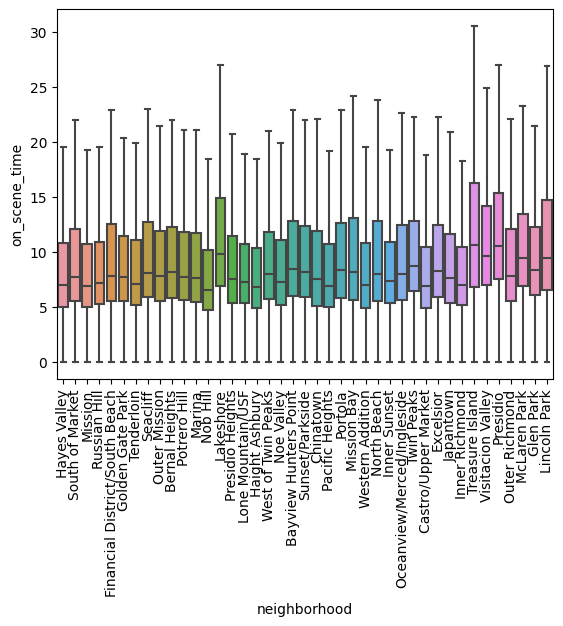

In [36]:
b = sns.boxplot(data = dat_fire, x = "neighborhood", y = "on_scene_time",showfliers = False)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
b.get_figure();

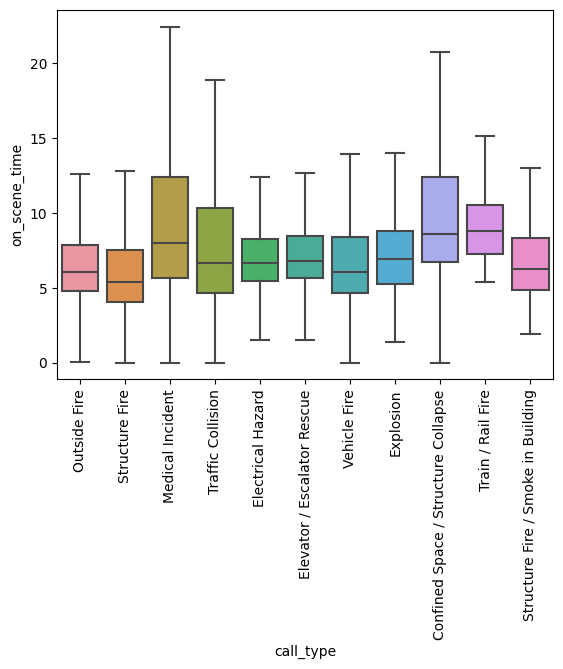

In [37]:
b = sns.boxplot(data = dat_fire, x = "call_type", y = "on_scene_time",showfliers = False)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
b.get_figure();

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'on_scene_time ~ neighborhood + battalion + call_type'

model = ols(formula, data=dat_fire).fit()

aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
neighborhood,1.874888e+05,40.0,35.720073,5.988442e-273
battalion,2.269124e+04,10.0,17.292397,7.078869e-32
call_type,1.422809e+04,7.0,15.489786,1.966959e-20
Residual,3.096433e+07,235971.0,NaN,NaN


### Only medical incidents

In [39]:
dat_med = dat[dat["call_type"] == 'Medical Incident']

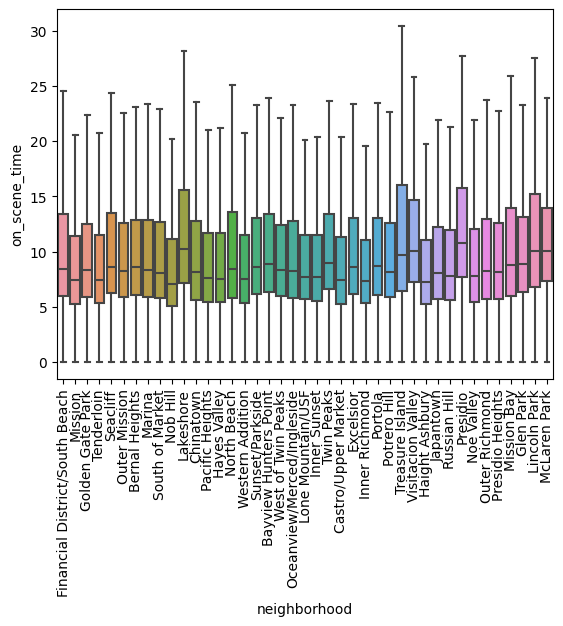

In [41]:
b = sns.boxplot(data = dat_med, x = "neighborhood", y = "on_scene_time",showfliers = False)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
b.get_figure();

### Time plots

In [47]:
dat_fire.columns
dat_fire = dat_fire[dat_fire["neighborhood"].notna()]
dat_fire['Year'] = dat_fire['received_dttm'].dt.year

res = dat_fire.groupby(['neighborhood','Year'])["on_scene_time"].mean().reset_index(name='mean')
processed_dat=res.pivot(index='Year',columns='neighborhood', values='mean').reset_index()
processed_dat=res.pivot(index='Year',columns='neighborhood', values='mean').reset_index()

/var/folders/bs/3y6b_92j2lncr3w27hl1qry80000gn/T/ipykernel_7888/81721773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat_fire['Year'] = dat_fire['received_dttm'].dt.year


In [81]:
pallette = Spectral[11]
#output_file("bokeh_inter.html")
descripts = ['Hayes Valley', 'South of Market', 'Mission', 'Russian Hill',
       'Financial District/South Beach', 'Golden Gate Park', 'Tenderloin',
       'Seacliff', 'Outer Mission', 'Bernal Heights', 'Potrero Hill',
       'Marina', 'Nob Hill', 'Lakeshore', 'Presidio Heights',
       'Lone Mountain/USF', 'Haight Ashbury', 'West of Twin Peaks',
       'Noe Valley', 'Bayview Hunters Point', 'Sunset/Parkside',
       'Chinatown', 'Pacific Heights', 'Portola', 'Mission Bay',
       'Western Addition', 'North Beach', 'Inner Sunset',
       'Oceanview/Merced/Ingleside', 'Twin Peaks', 'Castro/Upper Market',
       'Excelsior', 'Japantown', 'Inner Richmond', 'Treasure Island',
       'Visitacion Valley', 'Presidio', 'Outer Richmond', 'McLaren Park',
       'Glen Park', 'Lincoln Park']

src = ColumnDataSource(processed_dat)
years = [str(i) for i in range(2012,2022)]
p = figure(x_range=years, height=500, width=800, title="Average response time by neighborhood by years",
            toolbar_location=None, tools="hover")

items = [] ### for the custom legend
bar ={} # to store vbars
### here we will do a for loop:
for indx,i in enumerate(descripts):
    ### we will create a vbar for each focuscrime
    bar[i] = p.line(x='Year', y=i, source= src, alpha=0.9,
                    muted_alpha=0.1, width=0.9, line_width=2) 
    items.append((i, [bar[i]]))
    bar[i].visible = True if i==list(descripts)[0] else False
    hover = p.select(dict(type=HoverTool))
    hover.tooltips = [("Year", "@Year"), ("Value", "$y{0}"),]
    #hover.mode = 'mouse'

legend = Legend(items=items, location=(0, 10)) ## figure where to add it
p.add_layout(legend, 'left')
p.legend.click_policy="hide" ### assigns the click policy (you can try to use ''hide')
p.xaxis.axis_label = "Year"
p.yaxis.axis_label = "Average response time"
p.y_range.only_visible = True
p.y_range.start = 0
p.sizing_mode = 'scale_width'

#bokeh_deepnote_show(p) #displays your plot
show(p)

3. **Data Analysis**
- Describe your data analysis and explain what you've learned about the dataset.
- If relevant, talk about your machine-learning.

4. **Genre**. Which genre of data story did you use?
- Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
- Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?


5. **Visualizations**.
- Explain the visualizations you've chosen.
- Why are they right for the story you want to tell?

6. **Discussion**. Think critically about your creation
- What went well?,
- What is still missing? What could be improved?, Why?


7. **Contributions**. Who did what?
- You should write (just briefly) which group member was the main responsible for which elements of the assignment. (I want you guys to understand every part of the assignment, but usually there is someone who took lead role on certain portions of the work. That's what you should explain).
- It is not OK simply to write "All group members contributed equally".

8. Make sure that you use references when they're needed and follow academic standards.